In [21]:
import numpy as np
import contractions
from string import punctuation
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
from autocorrect import Speller
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from unidecode import unidecode
import seaborn as sns
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("train.csv")
df.head(2)

,text_id,full_text,grade,prompt,Overall,Cohesion,Syntax,Vocabulary,Phraseology,Grammar,Conventions
0,5AA45740A848,"Dear, TEACHER_NAME\n\nI think phone policy at ...",8,Cell phones at school,3.0,3.5,2.5,3.5,3.0,3.5,2.5
1,790891A35047,"Dear, Principal\r\n\r\nIn my opinion, I think ...",8,Cell phones at school,3.0,2.5,3.0,4.0,3.5,3.0,3.5


In [10]:
data = df[['full_text','prompt']]
data

,full_text,prompt
0,"Dear, TEACHER_NAME\n\nI think phone policy at ...",Cell phones at school
1,"Dear, Principal\r\n\r\nIn my opinion, I think ...",Cell phones at school
2,PHONES\n\nDear principal students should have ...,Cell phones at school
3,phones\n\ni think phones should be allowed in ...,Cell phones at school
4,Do you really think students need cell phones ...,Cell phones at school
...,...,...
6477,To: Maganer of the Generic_City Florida Local ...,Letter to employer
6478,"If people should make their own decisions, or ...",Self-reliance
6479,"I really like this quote because, i believe th...",Individuality
6480,The positive attitude is the key to success in...,Positive attitudes


In [49]:
data['full_text'][500]

'Some schools in Virginia are adopt a program that benefit students that can\'t\n\nbe in school for some reason. I agree with the idea,this idea consist that students can attend to their classes from home by the way of video conference or online.First, students with health problems are going to be benefit.Second, also students that have responsibilities in their homes, how having a full time job, can finish school with the help of this program.Finally, students that have problem with transport are also benefit with this awesome idea.On the other hand, some patterns said that their children have to be in school and have the same treat than other students and that schools should\n\nfind another way to help these students.\n\nI think the idea is going to be a great help for students with health problems.First, when my sister was in school she had problem with her legs and its\' was very difficult for her to come to school every day,if this idea was approved four years ago it will help my 

In [11]:
data.isna().sum()

full_text    0
prompt       0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

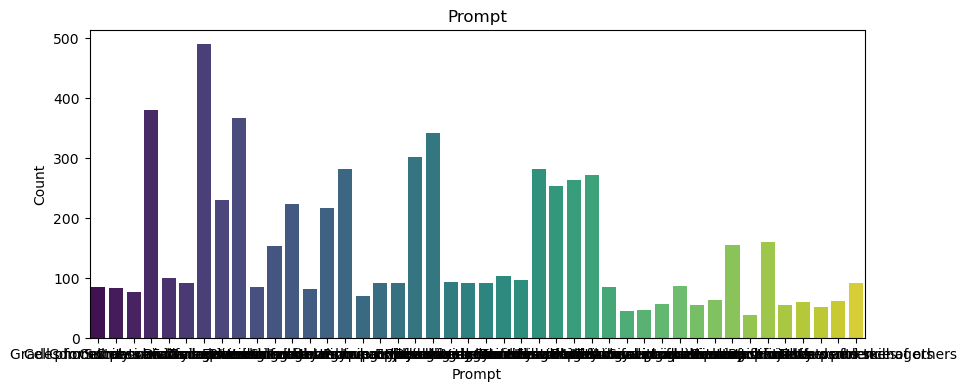

In [15]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'prompt',data = data, palette = 'viridis')
plt.title("Prompt")
plt.xlabel("Prompt")
plt.ylabel("Count")
plt.show()

In [16]:
data['prompt'].value_counts()

prompt
Distance learning                                 489
Success and failure                               379
Career commitment                                 367
Being busy                                        341
Impact of technology                              301
Trying something beyond what you have mastered    281
Positive attitudes                                281
Three-year high school program                    272
First impressions                                 263
Individuality                                     253
Four-day work week                                229
Self-reliance                                     223
Working with a group or alone                     217
Lunch menus                                       159
Influences of character                           155
Extended school day                               153
Year-round school                                 103
Cell phones in classrooms                          99
Afterschool homework 

In [28]:
def remove_spaces(data):
    clean_text = data.replace("\\n"," ").replace("\t"," ").replace("\\"," ")
    return clean_text


def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text


def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

stopword_list = stopwords.words('english')
stopword_list.remove("no")
stopword_list.remove("not")
stopword_list.remove("nor")


def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
    return clean_text


def autocorrection(data):
    spell = Speller(lang = 'en')
    corrected_text = spell(data)
    return corrected_text

def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_list = []
    for word in data:
        lemmatize_word = lemmatizer.lemmatize(word)
        final_list.append(lemmatize_word)
    return " ".join(final_list)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(data.full_text,data.prompt,random_state=42,test_size=0.2)

In [30]:
clean_text_train = x_train.apply(remove_spaces)
clean_text_test = x_test.apply(remove_spaces)

clean_text_train = clean_text_train.apply(expand_text) 
clean_text_test = clean_text_test.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented) 
clean_text_test = clean_text_test.apply(handling_accented)

clean_text_train = clean_text_train.apply(clean_data) 
clean_text_test = clean_text_test.apply(clean_data)

clean_text_train = clean_text_train.apply(lemmatization) 
clean_text_test = clean_text_test.apply(lemmatization)


In [31]:
clean_text_train

6049    think good idea student start career young age...
293     failure not worst thing not try worst thing wo...
2732    thomas jefferson wrote determine never idle wo...
445     possible people think success consist going fa...
1623    enjoyable activates outdoors park well many wa...
                              ...                        
3772    two mind think better one working someone else...
5191    society student expected identify career time ...
5226    american jazz legend duke ellington stated pro...
5390    matter samll act kindness never wasted school ...
860     live world almost everyone dream passion goal ...
Name: full_text, Length: 5185, dtype: object

In [32]:
count = CountVectorizer(max_df = 0.95,max_features=2000,ngram_range=(2,2))
count_val_train = count.fit_transform(clean_text_train)
count_val_test = count.transform(clean_text_test)

In [33]:
pd.DataFrame(count_val_train.toarray(),columns=count.get_feature_names_out())

,able attend,able get,able learn,able make,able take,able work,accomplish always,accomplish goal,accomplish something,accomplish thing,...,year not,year old,year program,year school,year student,young age,young people,young student,younger kid,younger student
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
count_mnb = MultinomialNB()
count_mnb.fit(count_val_train,y_train)
predict_cnt = count_mnb.predict(count_val_test)
acc_score = accuracy_score(y_test,predict_cnt)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_test,predict_cnt)
print("The classification report :\n",clf_rpt)

The accuracy score : 0.8774094063222821
The classification report :
                                                 precision    recall  f1-score   support

                     Afterschool homework club       0.76      0.94      0.84        17
                                    Being busy       0.89      0.95      0.92        77
                   Benefits of a good attitude       0.62      0.71      0.67         7
                         Benefits of a problem       0.83      0.83      0.83         6
                             Career commitment       0.99      0.94      0.96        70
                         Cell phones at school       0.94      0.83      0.88        18
                     Cell phones in classrooms       0.76      0.93      0.84        14
                             Community service       1.00      0.95      0.98        22
       Controlling extracurricular involvement       0.60      0.38      0.46        16
                     Creative arts requirement    

In [36]:
tfidf = TfidfVectorizer(max_df=0.95,max_features=2000,ngram_range=(2,2))
tfidf_val_train = tfidf.fit_transform(clean_text_train)
tfidf_val_test = tfidf.transform(clean_text_test)

In [37]:
pd.DataFrame(tfidf_val_train.toarray(),columns=tfidf.get_feature_names_out())

,able attend,able get,able learn,able make,able take,able work,accomplish always,accomplish goal,accomplish something,accomplish thing,...,year not,year old,year program,year school,year student,young age,young people,young student,younger kid,younger student
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.385442,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097887,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [53]:
tfidf_mnb = MultinomialNB()
tfidf_mnb.fit(tfidf_val_train,y_train)
predict_tfidf = tfidf_mnb.predict(tfidf_val_test)
acc_score = accuracy_score(y_test,predict_cnt)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_test,predict_tfidf)
print("The classification report :\n",clf_rpt)

The accuracy score : 0.8774094063222821
The classification report :
                                                 precision    recall  f1-score   support

                     Afterschool homework club       1.00      0.88      0.94        17
                                    Being busy       0.72      1.00      0.84        77
                   Benefits of a good attitude       0.00      0.00      0.00         7
                         Benefits of a problem       1.00      0.67      0.80         6
                             Career commitment       0.79      0.97      0.87        70
                         Cell phones at school       1.00      0.61      0.76        18
                     Cell phones in classrooms       0.72      0.93      0.81        14
                             Community service       1.00      0.77      0.87        22
       Controlling extracurricular involvement       1.00      0.12      0.22        16
                     Creative arts requirement    

In [40]:
log_reg = LogisticRegression(max_iter=2000,class_weight='balanced',n_jobs=-1)
log_reg.fit(tfidf_val_train.toarray(),y_train)
predict_tfidf = log_reg.predict(tfidf_val_test.toarray())
acc_score = accuracy_score(y_test,predict_tfidf)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_test,predict_tfidf)
print("The classification report :\n",clf_rpt)

The accuracy score : 0.8889745566692367
The classification report :
                                                 precision    recall  f1-score   support

                     Afterschool homework club       0.89      0.94      0.91        17
                                    Being busy       0.99      0.91      0.95        77
                   Benefits of a good attitude       0.56      0.71      0.62         7
                         Benefits of a problem       1.00      0.83      0.91         6
                             Career commitment       1.00      0.97      0.99        70
                         Cell phones at school       1.00      0.94      0.97        18
                     Cell phones in classrooms       0.93      0.93      0.93        14
                             Community service       0.95      0.91      0.93        22
       Controlling extracurricular involvement       0.67      0.50      0.57        16
                     Creative arts requirement    

In [54]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C = 1.0,class_weight='balanced',max_iter=3000,random_state=42)
svc.fit(tfidf_val_train,y_train)
predict_svc = svc.predict(tfidf_val_test)
acc_score = accuracy_score(y_test,predict_svc)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_test,predict_svc)
print("The classification report :\n",clf_rpt)

The accuracy score : 0.8912875867386276
The classification report :
                                                 precision    recall  f1-score   support

                     Afterschool homework club       0.84      0.94      0.89        17
                                    Being busy       0.96      0.92      0.94        77
                   Benefits of a good attitude       0.83      0.71      0.77         7
                         Benefits of a problem       1.00      0.67      0.80         6
                             Career commitment       1.00      0.97      0.99        70
                         Cell phones at school       0.90      1.00      0.95        18
                     Cell phones in classrooms       1.00      1.00      1.00        14
                             Community service       0.91      0.91      0.91        22
       Controlling extracurricular involvement       0.82      0.56      0.67        16
                     Creative arts requirement    

In [43]:
import joblib

joblib.dump(svc, "text_classifier_linearsvc.pkl")

['text_classifier_linearsvc.pkl']

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import joblib

X = df["full_text"]     # RAW TEXT
y = df["prompt"]

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=50000,
        ngram_range=(1,2),
        stop_words="english"
    )),
    ("clf", LinearSVC())
])

pipeline.fit(X, y)

joblib.dump(pipeline, "text_classifier_linearsvc.pkl")


['text_classifier_linearsvc.pkl']

In [62]:
prediction = pipeline.predict(['full_text'])[0]
print(prediction)



Places to visit


In [63]:
pipeline.fit(X, y)
joblib.dump(pipeline, "text_classifier_linearsvc.pkl")


['text_classifier_linearsvc.pkl']

In [64]:
model = joblib.load("text_classifier_linearsvc.pkl")

text = "Some schools in Virginia are adopting a new program..."
model.predict([text])


array(['Career commitment'], dtype=object)